<a href="https://colab.research.google.com/github/jumafernandez/BDM/blob/master/Guias/Guia_Arboles_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión con Scikit Learn

## Introducción
En esta guia vamos a experimientar como trabajar con el algoritmo de _árboles de clasificación_, que es una técnica de aprendizaje automático supervisado, a partir del dataset iris, con el que ya hemos trabajado algunas cuestiones de análisis exploratorio.
<br />
A lo largo de esta guía veremos:
- Como trabajar con datos en Python con la librería Pandas,
- Como entrenar un árbol de clasificación con la librería Scikit Learn,
- Como graficar el modelo entrenado,
- Como separar el dataset en datos de entrenamiento y test para generar modelos mas robustos.
- Como generar métricas de evaluación de los modelos.
- Cuales son los hiper-parámetros mas importantes del algoritmo de árboles de decisión.
- Como predecir la clase ante la aparición de nuevas instancias utilizando el modelo.

## Trabajando con datos en Scikit Learn (Python)
Para iniciar debemos importar la librería _iris_ que está incluida en Scikit Learn. También podríamos exportarla desde un archivo csv como veníamos trabajando. 
<br />

#### Lectura de archivos tradicional
Para importarla desde un archivo Github (simulando una lectura local):

In [1]:
!rm iris.csv
!wget https://raw.githubusercontent.com/jumafernandez/BDM/master/Guias/utiles/iris.csv

rm: cannot remove 'iris.csv': No such file or directory
--2019-10-12 13:43:02--  https://raw.githubusercontent.com/jumafernandez/BDM/master/Guias/utiles/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4361 (4.3K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.26K  --.-KB/s    in 0s      

2019-10-12 13:43:02 (83.1 MB/s) - ‘iris.csv’ saved [4361/4361]



Una vez que tenemos el archivo en la nube Colab, lo cargamos en un dataframe de pandas, el cual es similar a los que veniamos trabajando en R:

In [2]:
# Importamos la librería pandas (tipo de dato dataframe)
import pandas as pd 

# Lee el archivo
data = pd.read_csv("iris.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,#,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 6)

Siempre que trabajemos con Scikit Learn, vamos a trabajar con las features por un lado y el target (en aprendizaje supervisado) por otro lado:

In [0]:
# Separo "a mano" festures de target

# Features
feature_names = ['Sepal.Length', 'Sepal.Width','Petal.Length','Petal.Width']
x = data[feature_names]

# Target
y = data.Species

### El objeto bunch de Scikit Learn

En cambio, podemos trabajar con los datasets desde Scikit Learn. Para utilizarlos, primero debemos importar la librería y cargarla:

In [5]:
# Importamos el dataset iris de la librerías sklearn.datasets
from sklearn.datasets import load_iris

# Iris será un objeto "bunch" que es básicamente un diccionario de Python con un conjunto de claves
iris = load_iris()

print("Podemos pedir una descripción del dataset: ")
print(iris.DESCR)


Podemos pedir una descripción del dataset: 
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ======

Entre otros atributos, como los que se consultan a continuación:

In [6]:
print("Podemos ver los nombres de las features del dataset " + str(iris.feature_names))

print("Los posibles valores de la variable objetivo" + str(iris.target_names))

print("Donde está almacenado el archivo: " + iris.filename)

Podemos ver los nombres de las features del dataset ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Los posibles valores de la variable objetivo['setosa' 'versicolor' 'virginica']
Donde está almacenado el archivo: /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv


Scikit Learn tiene la particularidad que separa los valores de las features de la clase, a través de dos estructuras de datos diferentes:

In [7]:
print("Podemos ver los valores de las features -Por ejemplo, las primeras 5 instancias-:\n" + str(iris.data[0:5,]))
print("\nLa matriz de features es del tipo: + " + str(type(iris.data[0:5,])))
print("\nY por otro lado, los valores de la variable objetivo " + str(iris.target[0:5]))

Podemos ver los valores de las features -Por ejemplo, las primeras 5 instancias-:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

La matriz de features es del tipo: + <class 'numpy.ndarray'>

Y por otro lado, los valores de la variable objetivo [0 0 0 0 0]


## Árboles de Clasificación en Scikit Learn

A continuación, vamos a explorar como entrenar un árbol de clasificación, analizar el modelo entrenado y evaluarlo:

In [0]:
# Importamos tree, donde están implementados las técnicas relativas a árboles para trabajar con J-48 (Árboles de Decisión)
from sklearn import tree

# Instanciamos el árbol como un árbol de clasificación (existen varias técnicas basadas en árboles)
# Definimos que el criterio a utilizar para el entrenamiento es la entropia (Podría ser Gini, por ejemplo)
arbol = tree.DecisionTreeClassifier(criterion='entropy')


Ahora vamos a entrenar el árbol, para ello le pasamos los datos de los _features_ y el _target_:

In [0]:
# Ahora vamos a entrenar el dato con el método fit -le pasamos los X e Y
# X e Y (X=atributos e Y=target)
arbol = arbol.fit(iris.data, iris.target)


También puedo graficar el árbol resultante:

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'), Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'), Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'), Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'), Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'), Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'), Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'), Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2,

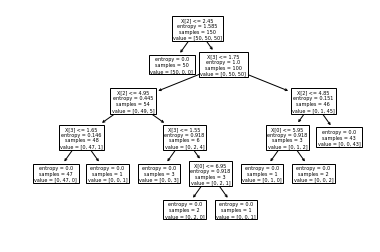

In [10]:
grafico=tree.plot_tree(arbol)

print(grafico)

Para ver mejor el gráfico, instalamos GraphViz que es una librería gráfica para Python:

In [11]:
!pip install graphviz

Y ahora lo volvemos a generar:

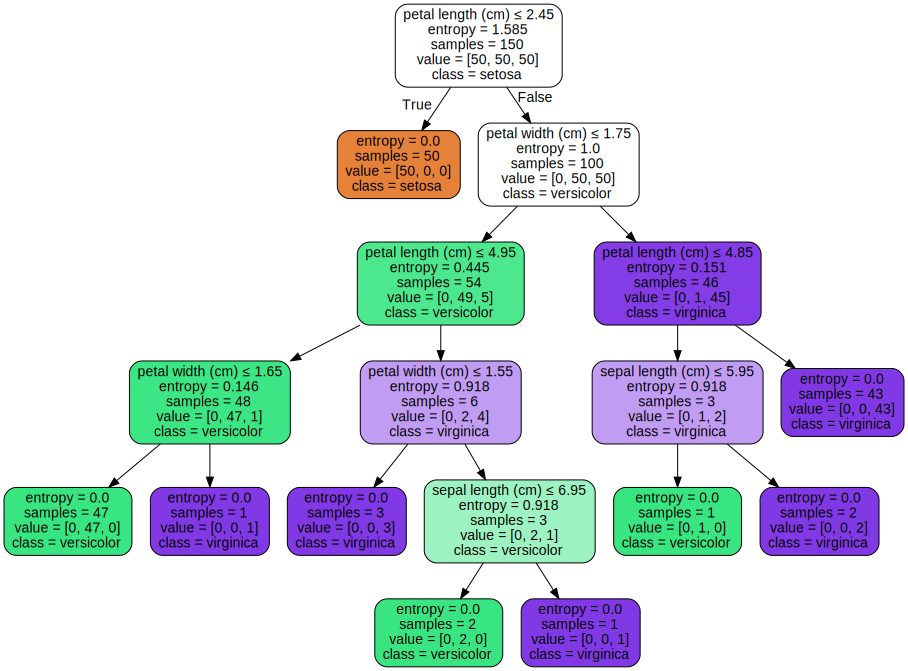

In [12]:
#Importamos la librería
import graphviz

dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph

## Separación en datos de entrenamiento y test

Para el ejemplo anterior, simplemente tomamos todos los datos del dataset __iris__ para entrenamiento y generamos el modelo con esos datos. <br />

Como vimos en la clase teórica, esta no es la forma mas robusta de evaluar el modelo. Lo que podemos hacer es generar un conjunto de datos de entrenamiento y otro de testeo:

In [0]:
from sklearn.model_selection import train_test_split

# Separo en 70-30 entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Creo el objeto Decision Tree classifer
arbol_tt = tree.DecisionTreeClassifier()

# Entreno el Decision Tree Classifer
arbol_tt = arbol_tt.fit(X_train,y_train)

#Realizo las predicciones en función del árbol generado
y_pred = arbol_tt.predict(X_test)


## Métricas de evaluación de modelos

Como vimos en teoría, luego debemos evaluar el modelo generado, para saber que tan robusto es. En _Scikit Learn_ lo hacemos de la siguiente manera:

In [14]:
from sklearn import metrics #Importar el módulo metrics de scikit-learn

# Vamos a testear el modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [15]:
import numpy as np
species = np.array(y_test)
predictions = np.array(y_pred)

metrics.confusion_matrix(species, predictions)


array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

## Parámetros del árbol de clasificación

Como la mayoría de los algoritmos de aprendizaje automático, los árboles de decisión poseen hiper-parámetros que podemos ajustar. En el caso de este algoritmo la calibración de parámetros es muy importante, tanto para la performance del árbol como para evitar el sobreajuste:

In [16]:
# Creo nuevamente el objeto Decision Tree classifer
# En este caso, instancio:
# criterion: cual es el criterio utilizado para la separación de instancias (gini o entropy)
# max_depth: máxima profundidad del árbol en términos de niveles
# min_samples_leaf: numero mínimo de instancias para formar una hoja
# class_weight: pesos asociados a cada valor de la clase
# min_samples_split: numero mínimo de instancias para formar una hoja
# max_features: cantidad máxima de features a incluir en el modelo
arbol_parametrizado = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=4)

# Entreno el Decision Tree Classifer con el mismo muestreo generado antes (70-30 %)
arbol_parametrizado = arbol_parametrizado.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = arbol_parametrizado.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9777777777777777


## Utilizando el modelo para clasificar/predecir casos nuevos

A partir del modelo generado, podríamos darle un nuevo caso y el árbol debería clasificarlo, lo cual equivale a "predecir" su clase:

In [17]:
# Haciendo nuevas predicciones a partir de los datos
pred_ejemplo1 = int(arbol.predict([[5, 7, 1, 3]]))
pred_ejemplo2 = int(arbol.predict([[11, 5, 3.2, 1.5]]))
print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo1]}.")
print(f"Este ejemplo corresponde a una flor {iris.target_names[pred_ejemplo2]}.")


Este ejemplo corresponde a una flor setosa.
Este ejemplo corresponde a una flor versicolor.


## Referencias & Recursos Web

- https://scikit-learn.org/stable/modules/tree.html#tree-classification

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- https://www.datacamp.com/community/tutorials/decision-tree-classification-python

- https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

- https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

- https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93

- https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

- https://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/
